# Build your first Neural Network purposely from scratch by Python
#### あえてニューラルネットワークをフロムスクラッチで書いてみた

![title](https://cdn-images-1.medium.com/max/800/1*_Kh8TzABRb5lAqAz69Ftnw.jpeg)

## 1. Generating a dataset データ生成

In [9]:
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

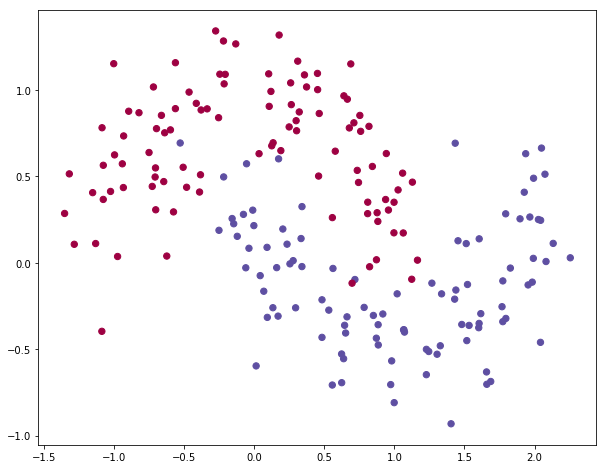

In [31]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

例えとして、ガンの陽性or陰性を想定する.  
ここでは、赤が陰性患者で、黒が陽性患者だと想定する.  
x軸とy軸は特徴量(X1, X2)となり得るDNA情報だとする.

## 2. Logistic Regression
まずはニューラルネットワークとの比較のためにロジスティック回帰で分類する.

In [27]:
# トレーニングデータで学習を開始する
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

/Users/akr712/.pyenv/versions/jupyter3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [32]:
# 決定境界をわかりやすく描写するための関数を定義 *ここは本題ではない
    
def plot_decision_boundary(pred_model):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

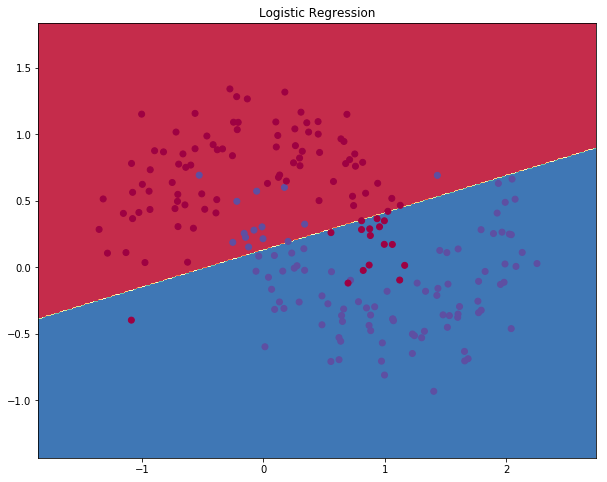

In [33]:
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

## 3. Training a Neural Network
ここからが本題のニューラルネットワークを用いた分類器の生成.

![title](https://www.ritchievink.com/img/post-9-mlp/nn_diagram_1.png)

入力層、隠れ層、出力層の３層からなる最もシンプルなニューラルネットワークを構築する.   
＊なお、図のサークル部分はノードと呼ばれ、ライン部分はエッジと呼ばれる.  
  
- 入力層のノード数：特徴の次元（ここではX1,X2の2次元）によって決まる.  
- 出力層のノード数：最終的に分類したいクラス数になる（分類問題やn数を指定したクラスタリング問題の場合に限る）.  
- 隠れ層のノード数：自分で決めることができる. 理論上はノード数が増えるほど複雑な学習が可能になる. ただし、以下2つのリスクを伴う. 
 1. 計算量の肥大化
 2. 過学習または汎化性の低下

### 隠れ層のノード数の決め方（学習の深さ）
結論：ない. これはもうタスク次第になってしまう. 記事の後半で隠れ層のノード数と予測の精度の関係を検証する. 

### 活性化関数の決め方
活性化関数とは？：隠れ層と出力層に存在する出力値を決定する関数

一般的に使われるのは、tanh関数, sigmoid関数, ReLU関数, softmax関数. 今回は隠れ層&出力層の活性化関数は以下に設定する.  

- 隠れ層：tanh関数（）
- 出力層：softmax関数（複数クラスの分類問題に最適）
  
NOTE: 4層以上の多層ニューラルネットワークにおいて、隠れ層の活性化関数は非線形関数（tanh関数, sigmoid関数, softmax関数）を使用する.

### 順伝播（Forward Propagation）と誤差逆伝播（Backforward Propagation）
線形代数と微分（最適化問題）   
Our goal is to find the parameters that minimize our loss function.  
予測のゴールは常に損失関数を最小にするパラメータを見つけること.   

### 順伝播（Forward Propagation）における重み（Weight）とバイアス（Bias）

### 誤差逆伝播（Backforward Propagation）における損失関数（Loss Function）
交差エントロピー

### 最小化に向けた勾配方法

- バッチ勾配降下法
- ミニバッチ勾配降下法
- 確率的勾配降下法 SGD (stochastic gradient descent) 

### サブトピック：勾配消失問題